# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [3]:
#LOAD THE DATA
import pandas as pd
import numpy as np
import tensorflow as tf
data = pd.read_csv("water_potability.csv")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
# Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Brief overview of the dataset statistics
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# drop duplicates rows of data
data = data.drop_duplicates()

In [7]:
# percentage of missingness in the data for each column
missing = data.isnull().mean()*100
print(missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [8]:
# MICE IMPUTATION to fill the missing data
# create the imputer using MICE

# separate the target variable from the rest of the data to make sure it is not changed or imputed
features = data.drop(columns='Potability')
target = data.Potability
imputer = IterativeImputer(random_state=0)
features_imputed = imputer.fit_transform(features)

# convert the data back into a dataframe
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# merge target variable and data
data_imputed = pd.concat([features_imputed, target], axis=1)
data_imputed.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190863,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.836463,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,331.981769,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,6.927779,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
# confirm imputed data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [16]:
# Remove outliers that may affect the neural network's accuracy using IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # anything above or below this is an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # place outliers in a data frame
    print(f"Column: {column_name}")
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%\n")

    # remove outliers
    df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_clean

# columns to remove outliers in
columns = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
data_imputed_copy = data_imputed.copy()
for i in columns:
  data_imputed_copy = remove_outliers_iqr(data_imputed_copy, i)

Column: Hardness
Number of outliers: 83
Percentage of outliers: 2.53%

Column: Solids
Number of outliers: 42
Percentage of outliers: 1.32%

Column: Sulfate
Number of outliers: 230
Percentage of outliers: 7.30%

Column: Conductivity
Number of outliers: 9
Percentage of outliers: 0.31%

Column: Organic_carbon
Number of outliers: 18
Percentage of outliers: 0.62%

Column: Trihalomethanes
Number of outliers: 47
Percentage of outliers: 1.62%

Column: Turbidity
Number of outliers: 17
Percentage of outliers: 0.60%



Plot the Data Appropriately

In [17]:
# generate 2d classification dataset
# X, y = pass
# Transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X = data_imputed_copy.drop(columns='Potability', axis=1)
y= data_imputed_copy['Potability']
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2830, 9)

In [18]:

# Split the data into training validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3,random_state=42,
    stratify=y               # Keep same class distribution in all splits
)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp)

print(f"\n=== FINAL SHAPES ===")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")




=== FINAL SHAPES ===
X_train: (1981, 9)
X_val: (424, 9)
X_test: (425, 9)
y_train: (1981,)
y_val: (424,)
y_test: (425,)


# Each Member Defines their model Here

In [19]:
#Model Definition by member 1
def model_jeremiah_agbaje():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), name='dense_layer', activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
  model.add(tf.keras.layers.Dropout(0.5))  # 50% dropout after first layer
  model.add(tf.keras.layers.Dense(64, name='dense_layer2', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
  model.add(tf.keras.layers.Dropout(0.5))  # 50% dropout after second layer
  model.add(tf.keras.layers.Dense(32, name='dense_layer3', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(1, name='output_layer', activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = model_jeremiah_agbaje()

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',    # Monitor validation loss
      patience=50,
      restore_best_weights=True  # Restore weights from best epoch
  )

# Train the model
history = model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  epochs=200,
  batch_size=32,
  verbose=1,
  callbacks=[early_stopping]
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5090 - loss: 0.7455 - val_accuracy: 0.5118 - val_loss: 0.6945
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5298 - loss: 0.7191 - val_accuracy: 0.5991 - val_loss: 0.6820
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5402 - loss: 0.7134 - val_accuracy: 0.6061 - val_loss: 0.6768
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 0.7056 - val_accuracy: 0.6250 - val_loss: 0.6736
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5658 - loss: 0.7002 - val_accuracy: 0.6226 - val_loss: 0.6710
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 0.6887 - val_accuracy: 0.6297 - val_loss: 0.6693
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 0.7070 - val_accuracy: 0.6321 - val_loss: 0.6691
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5684 - loss: 0.7021 - val_accuracy: 0.6297 - val_loss: 0.6

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)             │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer2 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer3 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,949 (136.52 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,300 (91.02 KB)

In [20]:
best_epoch = np.argmin(history.history['val_loss'])
print(f"Best Epoch: {best_epoch+1}")
print(f"Train Accuracy at Best Epoch: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Val Accuracy at Best Epoch: {history.history['val_accuracy'][best_epoch]:.4f}")

Best Epoch: 200
Train Accuracy at Best Epoch: 0.6623
Val Accuracy at Best Epoch: 0.6580


In [22]:
# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}\n Test Loss: {test_loss:.4f}")
# calculate precision, recall and f1_score

y_pred = model.predict(X_test)

# set a class threshold of 0.5 if the prediction probabilites are > 0.5 = positive, else = neagative
y_pred_classes = (y_pred > 0.5).astype("int32")

precision= precision_score(y_test, y_pred_classes)

recall = recall_score(y_test, y_pred_classes)

f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Accuracy: 0.6541
 Test Loss: 0.6225
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Precision: 0.6786
Recall: 0.1210
F1 Score: 0.2054


In [23]:
print(f"\n=== FINAL VALUES ===")
print(f"Best Epoch: {best_epoch+1}")
print(f"Train Accuracy at Best Epoch: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Val Accuracy at Best Epoch: {history.history['val_accuracy'][best_epoch]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")





=== FINAL VALUES ===
Best Epoch: 200
Train Accuracy at Best Epoch: 0.6623
Val Accuracy at Best Epoch: 0.6580
Test Accuracy: 0.6541
Test Loss: 0.6225
Precision: 0.6786
Recall: 0.1210
F1 Score: 0.2054


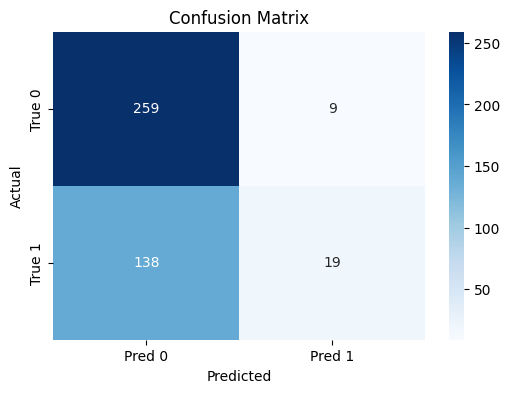

In [26]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()